## Pandas in Python for Economics and Finance

Pandas is a Python library that allows the manipulation of data through Dataframes.

### Very basics of Python

Python is a programming language. The main advantages of Python:
- it is free,
- it allows you to run code line by line,
- it has a simple syntax,
- it is well documented and easy to find help online,
- it has a lot of libraries that give access to a lot of functions. 

##### Python has variables:

In [1]:
x1 = 10 # numbers
x2 = 13.3
str1 = "Hi" # strings
group = [x1,x2] # lists
nums = {"int": x1, "float": x2} # dictionaries
a = [1, 2, 3, 4, 5, 6, 7, 8]
b = [e for e in a if e %2 == 0]

In [2]:
print(nums["float"])

13.3


##### Python has conditional statements:

In [3]:
if x1>x2:
    print("The integer is bigger.")
else:
    print("The float is bigger.")

The float is bigger.


##### Python has for loops

In [4]:
for key, val in nums.items():
    print(f"Key {key} is associated with value {val}.")

Key int is associated with value 10.
Key float is associated with value 13.3.


It is also object-oriented. Everything can have its own methods and properties. It is also convenien....

##### Python has functions

In [33]:
def weightedMean(nums, wts):
    "Computes the weighted mean. First argument is the array and the second are the weights."
    assert len(nums)==len(wts), "The arrays given do not have the same length!" 
    total = 0
    totalWts = 0
    for i in range(len(nums)):
        total += nums[i]*wts[i]
        totalWts += wts[i]
    return total/totalWts
        

In [6]:
weightedMean([10,20],[1,2])

16.666666666666668

### Now Pandas!

Python has many important libraries but here we will mostly look at Pandas. 

First we will import the library so that we can use it in our Python session:

In [43]:
import pandas as pd
import numpy as np

The way to start with Pandas is either my creating a Dataframe using data that has already been loaded, by reading an external file or by downloading the data.

In [44]:
import eurostat

In [59]:
### directly creating a dataframe works with:
# df=pd.Dataframe(data_variable) # and there can be more options
### laoding from a file one can use:
# pd.read_csv(), pd.read_excel() or pd.read_stata()
## Here I will use data that I download from the web. In particular, from Eurostat
# get info here: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing
df0 = eurostat.get_data_df("ei_cphi_m",flags=False) # "ei_cphi_m" this is the code for the HICP
df=df0

#### Take a look at the data

In [60]:
# head and tail
df.head(10)
# look at the column names
df.columns
# what are these other columns?
# df["unit"].unique()
# df["indic"].unique()
# df["s_adj"].unique()

Index(['unit', 's_adj', 'indic', 'geo\time', '2022M04', '2022M03', '2022M02',
       '2022M01', '2021M12', '2021M11',
       ...
       '1996M10', '1996M09', '1996M08', '1996M07', '1996M06', '1996M05',
       '1996M04', '1996M03', '1996M02', '1996M01'],
      dtype='object', length=320)

#### How to get to the data.

In [61]:
# it is similar to the dictionary notation
# each column is an entry to the dictionary and the key is the column's name
df["geo\\time"]
# then each column can be thought as a list (it is actually a pandas series) 
# and we can get to the elements by indices
df["geo\\time"][2]
# but pandas offers more
# multiple colums
df[["2022M04", "2021M04"]]
# iloc
df.iloc[1:10,0:2]
# loc
df.loc[:,["2022M04", "2021M04"]]
df.loc[((df["2022M04"]>120) & (df["2021M04"]<110))]
# this also gives us a way to filter and only get the options that we are interested for "unit" and "indic"
df = df.loc[((df["unit"]=="HICP2015")&(df["indic"]=="CP-HI00"))]
# this is also a way to rearrange or delete columns
df[["2021M04","2022M04"]]

2021M04  2022M04
0    110.83   118.78
1    110.32   120.61
2    108.08      NaN
3    100.79      NaN
4    100.70   109.40
5    114.00      NaN
6    108.40      NaN
7    104.10      NaN
8    107.14   115.17
9    107.11      NaN
10   107.14      NaN
11   111.30   132.49
12   101.29   110.80
13   106.39   115.26
14   108.53      NaN
15   108.08      NaN
16      NaN      NaN
17   105.85   111.83
18   107.02   112.78
19   104.90      NaN
20   117.75      NaN
21   102.80   110.30
22   105.37      NaN
23   105.10   112.00
24   113.57      NaN
25   108.56   118.30
26   110.65   125.26
27   109.15      NaN
28   106.77   112.00
29   108.95   121.19
30   115.90      NaN
31   113.20      NaN
32   104.36   112.10
33   113.70      NaN
34   113.60      NaN
35   109.54      NaN
36   105.85   113.63
37   110.10   122.09
38   204.02      NaN
39      NaN      NaN
40   110.67      NaN

In order to work with the data easier, I would like for the dates to appear as different rows. So, I need to reshape the data, pd.pivot() and  pd.stack() can be used for such operations. However for this case pd.melt() fits my use case better.

In [62]:
df = df.melt(id_vars=["unit","s_adj","indic","geo\\time"])
df
# I also drop the values that are NA
df = df.dropna()

In [63]:
df

unit s_adj    indic geo\time variable   value
0      HICP2015   NSA  CP-HI00       AT  2022M04  118.78
1      HICP2015   NSA  CP-HI00       BE  2022M04  120.61
4      HICP2015   NSA  CP-HI00       CY  2022M04  109.40
8      HICP2015   NSA  CP-HI00       EA  2022M04  115.17
11     HICP2015   NSA  CP-HI00       EE  2022M04  132.49
...         ...   ...      ...      ...      ...     ...
12950  HICP2015   NSA  CP-HI00       SE  1996M01   75.41
12951  HICP2015   NSA  CP-HI00       SI  1996M01   43.88
12952  HICP2015   NSA  CP-HI00       SK  1996M01   43.01
12953  HICP2015   NSA  CP-HI00       TR  1996M01    1.20
12954  HICP2015   NSA  CP-HI00       UK  1996M01   67.80

[12355 rows x 6 columns]

#### Functions on columns

In [64]:
# there are a lot of functions: sum, count, median, quantile, min, max, mean, var, std etc.
total = df["value"].sum()
total
# we can also get the main statistics of the data with
df.describe()


We can also apply our own function on the columns.

In [65]:
# the apply function
def skewness(col):
    avg = col.mean()
    n = len(col)
    return sum((col-avg)**3)/n/(sum((col-avg)**2)/n)**(3/2)
# ((n-1)*n)**(1/2)/(n-2)
df[["value"]].apply(skewness)


value   -0.248156
dtype: float64

In [66]:
df.skew()

value   -0.248186
dtype: float64

#### Rename, Create and Transform Columns

In [67]:
df = df.rename(columns={"variable":"date","value":"hicp","geo\\time":"country"})
# create a new column by assigning a column into a column of the dataframe 
# with a new name
df["year"] = df["date"].str.slice(0,4).astype(int)
df["month"] = df["date"].str.slice(5,7).astype(int)
df
# we can create lagged variables with shift
df["hicp"].shift(1)
# also arithmetic operations between columns
df["hicp"]+df["hicp"].shift(1)
df["hicp"]*df["hicp"].shift(1)
# but there are other transformations also, cumsum, cumprod, fillna, isnull etc
df["hicp"].cummax()

0        118.78
1        120.61
2        120.61
3        120.61
4        132.49
          ...  
12350    323.33
12351    323.33
12352    323.33
12353    323.33
12354    323.33
Name: hicp, Length: 12355, dtype: float64

We can also transform the data by changing their data type.

In [68]:
df[["hicp"]].astype("float16")
# this can also change the size of the dataframe
df[["hicp"]].info()
df[["hicp"]].astype("float16").info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 1 columns):
hicp    12355 non-null float64
dtypes: float64(1)
memory usage: 96.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 1 columns):
hicp    12355 non-null float16
dtypes: float16(1)
memory usage: 24.3 KB


unit s_adj    indic country     date    hicp  year  month
0      HICP2015   NSA  CP-HI00      AT  2022M04  118.78  2022      4
1      HICP2015   NSA  CP-HI00      BE  2022M04  120.61  2022      4
2      HICP2015   NSA  CP-HI00      CY  2022M04  109.40  2022      4
3      HICP2015   NSA  CP-HI00      EA  2022M04  115.17  2022      4
4      HICP2015   NSA  CP-HI00      EE  2022M04  132.49  2022      4
...         ...   ...      ...     ...      ...     ...   ...    ...
12350  HICP2015   NSA  CP-HI00      SE  1996M01   75.41  1996      1
12351  HICP2015   NSA  CP-HI00      SI  1996M01   43.88  1996      1
12352  HICP2015   NSA  CP-HI00      SK  1996M01   43.01  1996      1
12353  HICP2015   NSA  CP-HI00      TR  1996M01    1.20  1996      1
12354  HICP2015   NSA  CP-HI00      UK  1996M01   67.80  1996      1

[12355 rows x 8 columns]

#### Combining dataframes

In [69]:
# here I download another dataset
df02 = eurostat.get_data_df("ei_lmhr_m",flags=False) # this is the code for unemployment
df2 = df02
df2=df2.loc[((df2["indic"]=="LM-UN-T-TOT")&(df2["s_adj"]=="SA"))]

In [70]:
# df2["s_adj"].unique()
# df2["indic"].unique()
# df2["unit"].unique()

In [71]:
# append one frame to another by using pd.concat method

# merge dataframes
# inner keeps the rows that have common values across the datasets merged
# left keeps the rows of the first database
# right keeps the rows of the second database
# outer keeps the rows of both datasets


# I do the same reshaping as before
df2 = df2.melt(id_vars=["unit","s_adj","indic","geo\\time"])
df2 = df2.dropna()
df2 = df2.rename(columns={"variable":"date","value":"unemp","geo\\time":"country"})

# and now I can perform an inner join
df3 = pd.merge(df[["country","date","year","month","hicp"]], df2[["country","date","unemp"]], on=["country","date"])
df3 = df3[["country","date","year","month","hicp","unemp"]]
df3


country     date  year  month    hicp  unemp
0          IE  2022M04  2022      4  110.30    4.8
1          AT  2022M03  2022      3  118.11    4.2
2          BE  2022M03  2022      3  120.28    5.6
3          BG  2022M03  2022      3  118.59    4.3
4          CY  2022M03  2022      3  106.13    5.9
...       ...      ...   ...    ...     ...    ...
10119      NO  1996M01  1996      1   69.20    4.8
10120      PT  1996M01  1996      1   65.76    8.0
10121      SE  1996M01  1996      1   75.41    8.7
10122      SI  1996M01  1996      1   43.88    7.2
10123      UK  1996M01  1996      1   67.80    8.2

[10124 rows x 6 columns]

#### Calculations by groups

In [72]:
# after applying groupby we should use a function or a transformation 
# for example sum function
first_year = df3.groupby("country")["year"].min()
first_year
# we may also want to add a column to a frame that contains the result of a calculation by groups
# so, we do the calculation and then we merge it back to the dataframe
df3 = pd.merge(df3,first_year, on="country", how="left").drop_duplicates().rename(columns={"year_x":"year","year_y":"first_year"})
df3
# we can also apply a transformation after the groupby, then the grouping column is deleted and only the 
# transofrmation is returned
df3["inflation"]=df3["hicp"]-df3.groupby("country")["hicp"].shift(1)
df3
# finally I also define lag inflation
df3["lag_inflation"]=df3["inflation"].shift(1)

In [74]:
df3

country     date  year  month    hicp  unemp  first_year  inflation  \
0          IE  2022M04  2022      4  110.30    4.8        1996        NaN   
1          AT  2022M03  2022      3  118.11    4.2        1996        NaN   
2          BE  2022M03  2022      3  120.28    5.6        1996        NaN   
3          BG  2022M03  2022      3  118.59    4.3        2000        NaN   
4          CY  2022M03  2022      3  106.13    5.9        2000        NaN   
...       ...      ...   ...    ...     ...    ...         ...        ...   
10119      NO  1996M01  1996      1   69.20    4.8        1996      -0.10   
10120      PT  1996M01  1996      1   65.76    8.0        1996      -0.33   
10121      SE  1996M01  1996      1   75.41    8.7        1996      -0.19   
10122      SI  1996M01  1996      1   43.88    7.2        1996      -0.55   
10123      UK  1996M01  1996      1   67.80    8.2        1996      -0.30   

       lag_inflation  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
10119          -0.35  
10120          -0.10  
10121          -0.33  
10122          -0.19  
10123          -0.55  

[10124 rows x 9 columns]

#### Save data to external file

In [73]:
df3.to_csv("files/infl_unemp.csv")

## Run a regression

In [27]:
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [28]:
df3 = df3.dropna()
df3["const"] = 1
model=sm.OLS(df3["unemp"],df3[["const","inflation","lag_inflation"]])
results = model.fit()

In [38]:
# results.summary() gives the standard info about the regression
results.summary()
# and there is a lot more information (https://www.statsmodels.org/stable/index.html)
results.HC0_se
results.bse

const            0.043621
inflation        0.067642
lag_inflation    0.067914
dtype: float64

In [30]:
df3

country     date  year  month    hicp  unemp  first_year  inflation  \
32         BE  2022M02  2022      2  119.49    5.6        1996      -0.79   
33         BG  2022M02  2022      2  116.16    4.4        2000      -2.43   
34         CY  2022M02  2022      2  104.22    6.3        2000      -1.91   
35         CZ  2022M02  2022      2  124.40    2.5        1996      -2.40   
36         DE  2022M02  2022      2  113.30    3.0        1996      -2.80   
...       ...      ...   ...    ...     ...    ...         ...        ...   
10119      NO  1996M01  1996      1   69.20    4.8        1996      -0.10   
10120      PT  1996M01  1996      1   65.76    8.0        1996      -0.33   
10121      SE  1996M01  1996      1   75.41    8.7        1996      -0.19   
10122      SI  1996M01  1996      1   43.88    7.2        1996      -0.55   
10123      UK  1996M01  1996      1   67.80    8.2        1996      -0.30   

       lag_inflation  const  
32             -2.71      1  
33             -0.79      1  
34             -2.43      1  
35             -1.91      1  
36             -2.40      1  
...              ...    ...  
10119          -0.35      1  
10120          -0.10      1  
10121          -0.33      1  
10122          -0.19      1  
10123          -0.55      1  

[10082 rows x 10 columns]

## Compute the Fama French Factors

This code is taken from with some extra comments added by me: https://wrds-www.wharton.upenn.edu/pages/support/applications/python-replications/fama-french-factors-python/
The original paper can be found here: https://rady.ucsd.edu/faculty/directory/valkanov/pub/classes/mfe/docs/fama_french_jfe_1993.pdf (p. 8 for factors)

In [39]:
##########################################
# Fama French 3 Factors                  #
# Qingyi (Freda) Song Drechsler          #
# Date: April 2018                       #
# Updated: June 2020                     #
##########################################

import pandas as pd
import numpy as np
import datetime as dt
import wrds
#import psycopg2 
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
from scipy import stats

In [40]:
###################
# Connect to WRDS #01/01/2022
###################
conn=wrds.Connection()

Enter your WRDS username [nmelissi]: errikos
Enter your password: ····················


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  n


You can create this file yourself at any time
with the create_pgpass_file() function.
Loading library list...
Done


In [41]:
# this can be helpful in order to avoide downloading the data multiple times.
from joblib import Memory
# wrap function using joblib
temp_dir = './cache'
mem1 = Memory(temp_dir)
sql = mem1.cache(conn.raw_sql, ignore=['self'])
mem2 = Memory(temp_dir)
table = mem2.cache(conn.get_table, ignore=['self'])

In [42]:
# This dataset has the information for the book value
###################
# Compustat Block #
###################
# check the variable definitions here: https://wrds-www.wharton.upenn.edu/data-dictionary/comp_na_daily_all/
# gvkey:      global company key
# at:         assets total
# pstkl:      preferred stock - liquidating value
# txditc:     deferred taxes and investment tax credit
# pstkrv:     preferred stock redemption value
# seq:        investment securities equity
# pstk:       preferred/preference stock (capital) - total

# comp = conn.raw_sql("""
#                     select gvkey, datadate, at, pstkl, txditc,
#                     pstkrv, seq, pstk
#                     from comp.funda
#                     where indfmt='INDL' 
#                     and datafmt='STD'
#                     and popsrc='D'
#                     and consol='C'
#                     and datadate >= '01/01/1959'
#                     """, date_cols=['datadate'])
comp = sql("""
                    select gvkey, datadate, at, pstkl, txditc,
                    pstkrv, seq, pstk
                    from comp.funda
                    where indfmt='INDL' 
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and datadate >= '01/01/1959'
                    """, date_cols=['datadate'])

comp['year']=comp['datadate'].dt.year

In [571]:
comp

gvkey   datadate         at  pstkl   txditc  pstkrv        seq  pstk  \
0      001000 1961-12-31        NaN    0.0    0.000     NaN        NaN   NaN   
1      001000 1962-12-31        NaN    0.0      NaN     NaN        NaN   0.0   
2      001000 1963-12-31        NaN    0.0    0.008     0.0      0.553   0.0   
3      001000 1964-12-31      1.416    0.0    0.020     0.0      0.607   0.0   
4      001000 1965-12-31      2.310    0.0    0.000     0.0      0.491   0.0   
...       ...        ...        ...    ...      ...     ...        ...   ...   
37795  347085 2021-02-28    192.079    0.0    2.769     0.0     56.357   0.0   
37796  351491 2019-12-31  17847.000    0.0   11.000     0.0   3007.000   0.0   
37797  351590 2019-12-31  62131.888    0.0  106.607     0.0  11054.622   0.0   
37798  351590 2020-12-31  60256.041    0.0  119.333     0.0   9914.300   0.0   
37799  351590 2021-12-31  62325.449    0.0   77.338     0.0  18106.225   0.0   

       year  
0      1961  
1      1962  
2      1963  
3      1964  
4      1965  
...     ...  
37795  2021  
37796  2019  
37797  2019  
37798  2020  
37799  2021  

[537800 rows x 9 columns]

In [572]:
# create preferrerd stock
# np.where: vectorised version of if condition then A else B
comp['ps']=np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['ps']=np.where(comp['ps'].isnull(),comp['pstk'], comp['ps'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])
comp['txditc']=comp['txditc'].fillna(0)

In [573]:
# create book equity
comp['be']=comp['seq']+comp['txditc']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan) # disallows negative equity

In [574]:
# number of years in Compustat
comp=comp.sort_values(by=['gvkey','datadate']) # sort 
comp['count']=comp.groupby(['gvkey']).cumcount() # count the periods
comp=comp[['gvkey','datadate','year','be','count']] # rearrange and keep relevant columns

In [577]:
# This dataset has the information on the returns
###################
# CRSP Block      #
###################
# sql similar to crspmerge macro

# variable definitions here: https://wrds-www.wharton.upenn.edu/data-dictionary/crsp_a_stock/
# msf
# ret:          returns
# retx:         returns without dividends
# shrout:       shares outstanding
# prc:          price
# msenames
# shrcd:        share code
# exchcd:       exchange code
# crsp_m = conn.raw_sql("""
#                       select a.permno, a.permco, a.date, b.shrcd, b.exchcd,
#                       a.ret, a.retx, a.shrout, a.prc
#                       from crsp.msf as a
#                       left join crsp.msenames as b
#                       on a.permno=b.permno
#                       and b.namedt<=a.date
#                       and a.date<=b.nameendt
#                       where a.date between '01/01/1959' and '12/31/2017'
#                       and b.exchcd between 1 and 3
#                       """, date_cols=['date']) 
crsp_m = sql("""
                      select a.permno, a.permco, a.date, b.shrcd, b.exchcd,
                      a.ret, a.retx, a.shrout, a.prc
                      from crsp.msf as a
                      left join crsp.msenames as b
                      on a.permno=b.permno
                      and b.namedt<=a.date
                      and a.date<=b.nameendt
                      where a.date between '01/01/1959' and '12/31/2017'
                      and b.exchcd between 1 and 3
                      """, date_cols=['date']) 

# change variable format to int
crsp_m[['permco','permno','shrcd','exchcd']]=crsp_m[['permco','permno','shrcd','exchcd']].astype(int)

# Line up date to be end of month
crsp_m['jdate']=crsp_m['date']+MonthEnd(0)

In [581]:
# add delisting return

# dlret:        delisting return
# dlstdt:       delisting date
# dlret = conn.raw_sql("""
#                      select permno, dlret, dlstdt 
#                      from crsp.msedelist
#                      """, date_cols=['dlstdt'])

dlret = sql("""
                     select permno, dlret, dlstdt 
                     from crsp.msedelist
                     """, date_cols=['dlstdt'])


dlret.permno=dlret.permno.astype(int)
#dlret['dlstdt']=pd.to_datetime(dlret['dlstdt'])
dlret['jdate']=dlret['dlstdt']+MonthEnd(0)

crsp = pd.merge(crsp_m, dlret, how='left',on=['permno','jdate']) # merging
crsp['dlret']=crsp['dlret'].fillna(0)
crsp['ret']=crsp['ret'].fillna(0)

# retadj factors in the delisting returns
crsp['retadj']=(1+crsp['ret'])*(1+crsp['dlret'])-1

#---> Here the market equity os defined
# calculate market equity
crsp['me']=crsp['prc'].abs()*crsp['shrout'] 
crsp=crsp.drop(['dlret','dlstdt','prc','shrout'], axis=1)
crsp=crsp.sort_values(by=['jdate','permco','me'])

In [67]:
### Aggregate Market Cap ###
# sum of me across different permno belonging to same permco a given date
crsp_summe = crsp.groupby(['jdate','permco'])['me'].sum().reset_index() # operations by group

# largest mktcap within a permco/date
crsp_maxme = crsp.groupby(['jdate','permco'])['me'].max().reset_index()

# join by jdate/maxme to find the permno
crsp1=pd.merge(crsp, crsp_maxme, how='inner', on=['jdate','permco','me'])

# drop me column and replace with the sum me
crsp1=crsp1.drop(['me'], axis=1)

# join with sum of me to get the correct market cap info
crsp2=pd.merge(crsp1, crsp_summe, how='inner', on=['jdate','permco'])

# sort by permno and date and also drop duplicates
crsp2=crsp2.sort_values(by=['permno','jdate']).drop_duplicates()


In [68]:
# keep December market cap
crsp2['year']=crsp2['jdate'].dt.year
crsp2['month']=crsp2['jdate'].dt.month
decme=crsp2[crsp2['month']==12] #---> Only keeps the Decembers in the sample
decme=decme[['permno','date','jdate','me','year']].rename(columns={'me':'dec_me'})

### July to June dates
crsp2['ffdate']=crsp2['jdate']+MonthEnd(-6)
crsp2['ffyear']=crsp2['ffdate'].dt.year
crsp2['ffmonth']=crsp2['ffdate'].dt.month
crsp2['1+retx']=1+crsp2['retx']
crsp2=crsp2.sort_values(by=['permno','date'])

In [69]:
# cumret by stock
crsp2['cumretx']=crsp2.groupby(['permno','ffyear'])['1+retx'].cumprod() # ---> tranformation of column

# lag cumret
crsp2['lcumretx']=crsp2.groupby(['permno'])['cumretx'].shift(1)

# lag market cap
crsp2['lme']=crsp2.groupby(['permno'])['me'].shift(1)

# if first permno then use me/(1+retx) to replace the missing value
crsp2['count']=crsp2.groupby(['permno']).cumcount()
crsp2['lme']=np.where(crsp2['count']==0, crsp2['me']/crsp2['1+retx'], crsp2['lme'])

# baseline me
mebase=crsp2[crsp2['ffmonth']==1][['permno','ffyear', 'lme']].rename(columns={'lme':'mebase'})

# merge result back together
crsp3=pd.merge(crsp2, mebase, how='left', on=['permno','ffyear'])
crsp3['wt']=np.where(crsp3['ffmonth']==1, crsp3['lme'], crsp3['mebase']*crsp3['lcumretx'])

decme['year']=decme['year']+1
decme=decme[['permno','year','dec_me']]

In [70]:
# Info as of June
crsp3_jun = crsp3[crsp3['month']==6] # ---> just filter the observations in June.

crsp_jun = pd.merge(crsp3_jun, decme, how='inner', on=['permno','year'])
crsp_jun=crsp_jun[['permno','date', 'jdate', 'shrcd','exchcd','retadj','me','wt','cumretx','mebase','lme','dec_me']]
crsp_jun=crsp_jun.sort_values(by=['permno','jdate']).drop_duplicates()

In [71]:
# This database contains the information in order to link with the compustat database
# which was used to compute the book value
#######################
# CCM Block           #
#######################
# variable definitions here: https://wrds-www.wharton.upenn.edu/data-dictionary/crsp_a_ccm/ccmxpf_linktable/



# ccm=conn.raw_sql("""
#                   select gvkey, lpermno as permno, linktype, linkprim, 
#                   linkdt, linkenddt
#                   from crsp.ccmxpf_linktable
#                   where substr(linktype,1,1)='L'
#                   and (linkprim ='C' or linkprim='P')
#                   """, date_cols=['linkdt', 'linkenddt'])
ccm=sql("""
                  select gvkey, lpermno as permno, linktype, linkprim, 
                  linkdt, linkenddt
                  from crsp.ccmxpf_linktable
                  where substr(linktype,1,1)='L'
                  and (linkprim ='C' or linkprim='P')
                  """, date_cols=['linkdt', 'linkenddt'])

# if linkenddt is missing then set to today date
ccm['linkenddt']=ccm['linkenddt'].fillna(pd.to_datetime('today'))

ccm1=pd.merge(comp[['gvkey','datadate','be', 'count']],ccm,how='left',on=['gvkey'])
ccm1['yearend']=ccm1['datadate']+YearEnd(0)
ccm1['jdate']=ccm1['yearend']+MonthEnd(6)

In [72]:
# set link date bounds
ccm2=ccm1[(ccm1['jdate']>=ccm1['linkdt'])&(ccm1['jdate']<=ccm1['linkenddt'])]
ccm2=ccm2[['gvkey','permno','datadate','yearend', 'jdate','be', 'count']]

# link comp and crsp
ccm_jun=pd.merge(crsp_jun, ccm2, how='inner', on=['permno', 'jdate']) # ---> This is merging the two main datasets
ccm_jun['beme']=ccm_jun['be']*1000/ccm_jun['dec_me'] # ---> calculate book to market ratio


In [73]:
# select NYSE stocks for bucket breakdown
# exchcd = 1 and positive beme and positive me and shrcd in (10,11) and at least 2 years in comp
nyse=ccm_jun[(ccm_jun['exchcd']==1) & (ccm_jun['beme']>0) & (ccm_jun['me']>0) & \
             (ccm_jun['count']>=1) & ((ccm_jun['shrcd']==10) | (ccm_jun['shrcd']==11))]

# size breakdown
nyse_sz=nyse.groupby(['jdate'])['me'].median().to_frame().reset_index().rename(columns={'me':'sizemedn'}) # ---> define median

# beme breakdown
nyse_bm=nyse.groupby(['jdate'])['beme'].describe(percentiles=[0.3, 0.7]).reset_index() # ---> define value percentiles
nyse_bm=nyse_bm[['jdate','30%','70%']].rename(columns={'30%':'bm30', '70%':'bm70'})

nyse_breaks = pd.merge(nyse_sz, nyse_bm, how='inner', on=['jdate'])

# join back size and beme breakdown
ccm1_jun = pd.merge(ccm_jun, nyse_breaks, how='left', on=['jdate'])

In [74]:
# function to assign sz and bm bucket
def sz_bucket(row):
    if row['me']==np.nan:
        value=''
    elif row['me']<=row['sizemedn']:
        value='S'
    else:
        value='B'
    return value

def bm_bucket(row):
    if 0<=row['beme']<=row['bm30']:
        value = 'L'
    elif row['beme']<=row['bm70']:
        value='M'
    elif row['beme']>row['bm70']:
        value='H'
    else:
        value=''
    return value


In [75]:
# assign size portfolio # ---> assignment
ccm1_jun['szport']=np.where((ccm1_jun['beme']>0)&(ccm1_jun['me']>0)&(ccm1_jun['count']>=1), ccm1_jun.apply(sz_bucket, axis=1), '')

# assign book-to-market portfolio ---> assignment
ccm1_jun['bmport']=np.where((ccm1_jun['beme']>0)&(ccm1_jun['me']>0)&(ccm1_jun['count']>=1), ccm1_jun.apply(bm_bucket, axis=1), '')

# create positivebmeme and nonmissport variable
ccm1_jun['posbm']=np.where((ccm1_jun['beme']>0)&(ccm1_jun['me']>0)&(ccm1_jun['count']>=1), 1, 0)
ccm1_jun['nonmissport']=np.where((ccm1_jun['bmport']!=''), 1, 0)

In [76]:
# store portfolio assignment as of June
june=ccm1_jun[['permno','date', 'jdate', 'bmport','szport','posbm','nonmissport']]
june['ffyear']=june['jdate'].dt.year

# merge back with monthly records
crsp3 = crsp3[['date','permno','shrcd','exchcd','retadj','me','wt','cumretx','ffyear','jdate']]
ccm3=pd.merge(crsp3, 
        june[['permno','ffyear','szport','bmport','posbm','nonmissport']], how='left', on=['permno','ffyear'])

# keeping only records that meet the criteria
ccm4=ccm3[(ccm3['wt']>0)& (ccm3['posbm']==1) & (ccm3['nonmissport']==1) & 
          ((ccm3['shrcd']==10) | (ccm3['shrcd']==11))]


/tmp/ipykernel_42230/1430860703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june['ffyear']=june['jdate'].dt.year


In [77]:
############################
# Form Fama French Factors #
############################

# function to calculate value weighted return
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [78]:

# value-weigthed return
vwret=ccm4.groupby(['jdate','szport','bmport']).apply(wavg, 'retadj','wt').to_frame().reset_index().rename(columns={0: 'vwret'})
vwret['sbport']=vwret['szport']+vwret['bmport']
# firm count
vwret_n=ccm4.groupby(['jdate','szport','bmport'])['retadj'].count().reset_index().rename(columns={'retadj':'n_firms'})
vwret_n['sbport']=vwret_n['szport']+vwret_n['bmport']

# tranpose
ff_factors=vwret.pivot(index='jdate', columns='sbport', values='vwret').reset_index()
ff_nfirms=vwret_n.pivot(index='jdate', columns='sbport', values='n_firms').reset_index()


In [79]:
# create SMB and HML factors
ff_factors['WH']=(ff_factors['BH']+ff_factors['SH'])/2
ff_factors['WL']=(ff_factors['BL']+ff_factors['SL'])/2
ff_factors['WHML'] = ff_factors['WH']-ff_factors['WL']

ff_factors['WB']=(ff_factors['BL']+ff_factors['BM']+ff_factors['BH'])/3
ff_factors['WS']=(ff_factors['SL']+ff_factors['SM']+ff_factors['SH'])/3
ff_factors['WSMB'] = ff_factors['WS']-ff_factors['WB']
ff_factors=ff_factors.rename(columns={'jdate':'date'})

# n firm count
ff_nfirms['H']=ff_nfirms['SH']+ff_nfirms['BH']
ff_nfirms['L']=ff_nfirms['SL']+ff_nfirms['BL']
ff_nfirms['HML']=ff_nfirms['H']+ff_nfirms['L']

ff_nfirms['B']=ff_nfirms['BL']+ff_nfirms['BM']+ff_nfirms['BH']
ff_nfirms['S']=ff_nfirms['SL']+ff_nfirms['SM']+ff_nfirms['SH']
ff_nfirms['SMB']=ff_nfirms['B']+ff_nfirms['S']
ff_nfirms['TOTAL']=ff_nfirms['SMB']
ff_nfirms=ff_nfirms.rename(columns={'jdate':'date'})

In [80]:
###################
# Compare With FF #
###################
# _ff = conn.get_table(library='ff', table='factors_monthly')
_ff = table(library='ff', table='factors_monthly')
_ff=_ff[['date','smb','hml']]
_ff['date']=_ff['date']+MonthEnd(0)

_ffcomp = pd.merge(_ff, ff_factors[['date','WSMB','WHML']], how='inner', on=['date'])
_ffcomp70=_ffcomp[_ffcomp['date']>='01/01/1970']
print(stats.pearsonr(_ffcomp70['smb'], _ffcomp70['WSMB']))
print(stats.pearsonr(_ffcomp70['hml'], _ffcomp70['WHML']))

(0.9959347155821368, 0.0)
(0.9821803335953425, 0.0)


In [81]:
_ffcomp.head(2)

date     smb     hml  WSMB  WHML
0 1961-07-31 -0.0184 -0.0018   NaN   NaN
1 1961-08-31 -0.0177 -0.0027   NaN   NaN

In [82]:
_ffcomp.dtypes

date    datetime64[ns]
smb            float64
hml            float64
WSMB           float64
WHML           float64
dtype: object

In [83]:
_ffcomp.tail(2)

date     smb     hml      WSMB      WHML
676 2017-11-30 -0.0056 -0.0005 -0.003746 -0.003502
677 2017-12-31 -0.0132  0.0003 -0.010692 -0.001674

In [84]:
_ffcomp.date = pd.to_datetime(_ffcomp.date)
_ffcomp.set_index('date', inplace=True)
_ffcomp.head(2)

smb     hml  WSMB  WHML
date                                  
1961-07-31 -0.0184 -0.0018   NaN   NaN
1961-08-31 -0.0177 -0.0027   NaN   NaN

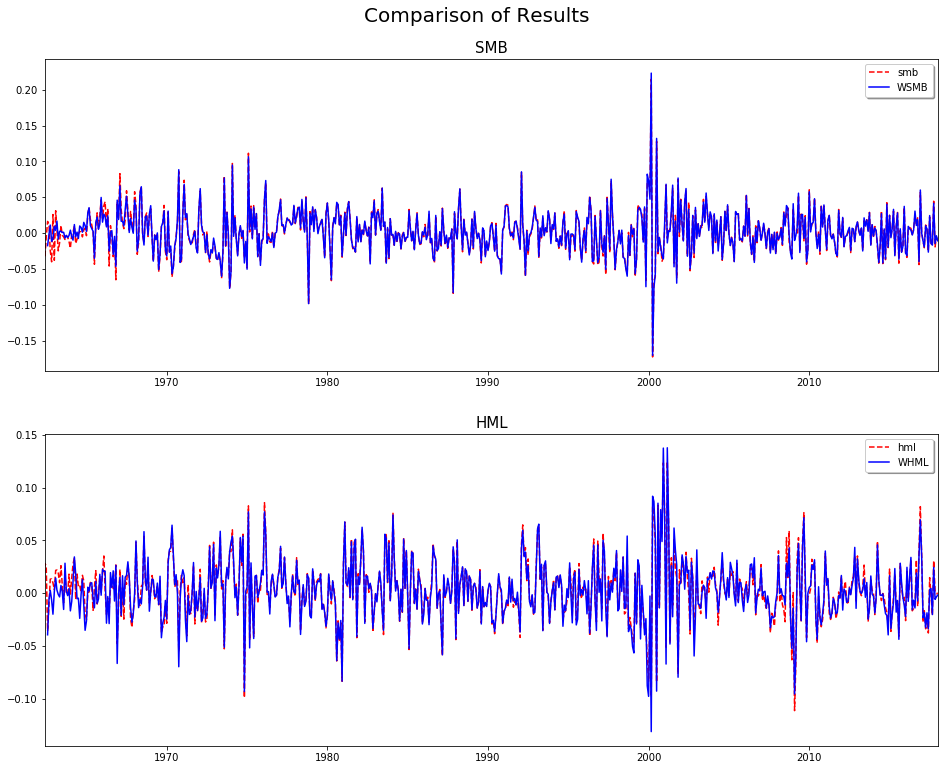

In [85]:
plt.figure(figsize=(16,12))
plt.suptitle('Comparison of Results', fontsize=20)

ax1 = plt.subplot(211)
ax1.set_title('SMB', fontsize=15)
ax1.set_xlim([dt.datetime(1962,6,1), dt.datetime(2017,12,31)])
ax1.plot(_ffcomp['smb'], 'r--', _ffcomp['WSMB'], 'b-')
ax1.legend(('smb','WSMB'), loc='upper right', shadow=True)

ax2 = plt.subplot(212)
ax2.set_title('HML', fontsize=15)
ax2.plot(_ffcomp['hml'], 'r--', _ffcomp['WHML'], 'b-')
ax2.set_xlim([dt.datetime(1962,6,1), dt.datetime(2017,12,31)])
ax2.legend(('hml','WHML'), loc='upper right', shadow=True)

plt.subplots_adjust(top=0.92, hspace=0.2)

plt.show()